In [20]:
brut <- read.csv("brut.csv",
                 sep = ";",
                 header = T,
                 encoding = "UTF-8",
                 dec = ","
                )

region <- read.csv("region.csv",
                   sep = ";",
                   header = T,
                   encoding = "UTF-8"
                  )

citizenship <- read.csv("locally_foreign.csv",
                        sep = ";",
                        header = T,
                        encoding = "UTF-8"
                       )

In [21]:
brut <- merge(region,
              merge(citizenship,
                    aggregate(brut[, 3:19], list(brut$Country), mean, na.rm = T),
                    by.x = "Country", by.y = "Group.1"),
              by = "Country")

In [22]:
levels(brut$Region)

[1] "Central and Eastern Europe"         "Commonwealth of Independent States"
 [3] "East Asia"                          "Latin America and Caribbean"       
 [5] "Middle East and North Africa"       "North America and ANZ"             
 [7] "South Asia"                         "Southeast Asia"                    
 [9] "Sub-Saharan Africa"                 "Western Europe"

In [23]:
head(brut)

Country,Region,Foreign_born,Whisker.high,Whisker.low,Locally_born,Life_Ladder,GDP_PPP,Social_support,HALE_birth,...,Positive_affect,Negative_affect,Confidence_government,Democratic_Quality,Delivery_Quality,GINI_2000_16_WB,GINI_household_income_Gallup,Trust_People_Gallup,Trust_people_WVS_05_09,Trust_people_WVS_10_14
Afghanistan,South Asia,"4,068","4,268","3,869","3,853",3.705495,1713.203,0.5162701,52.25455,...,0.5666233,0.3107030,0.3971897,-1.8966928,-1.4765236,NaN,0.3761697,0.2810740,NaN,NaN
Argentina,Latin America and Caribbean,"5,843","6,077","5,609","6,440",6.358951,18522.625,0.9056055,67.71538,...,0.8394063,0.2768269,0.3898764,0.2067990,-0.4661795,0.4609375,0.3550522,0.1991232,0.1740575,0.1935307
Armenia,Commonwealth of Independent States,"4,101","4,262","3,940","4,418",4.438665,7573.231,0.7137752,65.63077,...,0.5464819,0.4344486,0.3304487,-0.4045399,-0.2156013,0.3192500,0.4109090,0.1566443,NaN,0.1091358
Australia,North America and ANZ,"7,249","7,332","7,167","7,324",7.298081,42673.445,0.9485205,72.46667,...,0.8058491,0.2152142,0.5032259,1.1817487,1.7895835,0.3427500,0.4309005,NaN,0.4613790,0.5181401
Austria,Western Europe,"6,903","7,076","6,729","7,261",7.249100,44396.501,0.9268618,71.85818,...,0.7911639,0.1732441,0.4237300,1.2874848,1.6374614,0.3026923,0.3306453,0.3006652,NaN,NaN
Azerbaijan,Commonwealth of Independent States,"4,735","4,974","4,495","4,923",4.923112,15317.273,0.7617180,63.80000,...,0.5673765,0.2358657,0.7559600,-0.9853211,-0.6862568,0.2110000,0.3062165,0.2740562,NaN,0.1479329


Modele 1: brut

In [25]:
plot(log(brut$GDP_PPP), brut$Life_Ladder)

ERROR: Error in png(tf, width, height, "in", pointsize, bg, res, antialias = antialias): impossible de démarrer le périphérique png()


plot without title

In [47]:
mod1 <- lm(Life_Ladder~., data = brut[,2:18])
summary(mod1)


Call:
lm(formula = Life_Ladder ~ ., data = brut[, 2:18])

Residuals:
     Min       1Q   Median       3Q      Max 
-0.29494 -0.15912 -0.03958  0.08260  0.58701 

Coefficients:
                               Estimate Std. Error t value Pr(>|t|)   
(Intercept)                   4.861e+00  5.075e+00   0.958  0.35870   
GDP_PPP                       4.696e-05  1.559e-05   3.012  0.01183 * 
Social_support                1.382e+00  1.428e+00   0.967  0.35411   
HALE_birth                   -5.206e-02  6.447e-02  -0.807  0.43650   
Freedom                       7.988e-01  1.316e+00   0.607  0.55616   
Generosity                    1.373e+00  1.054e+00   1.303  0.21910   
Corruption                   -1.352e-01  1.013e+00  -0.133  0.89624   
Positive_affect               3.304e+00  3.276e+00   1.009  0.33481   
Negative_affect               2.051e+00  1.455e+00   1.410  0.18622   
Confidence_government        -1.130e+00  1.029e+00  -1.098  0.29548   
Democratic_Quality           -7.388e-02  2

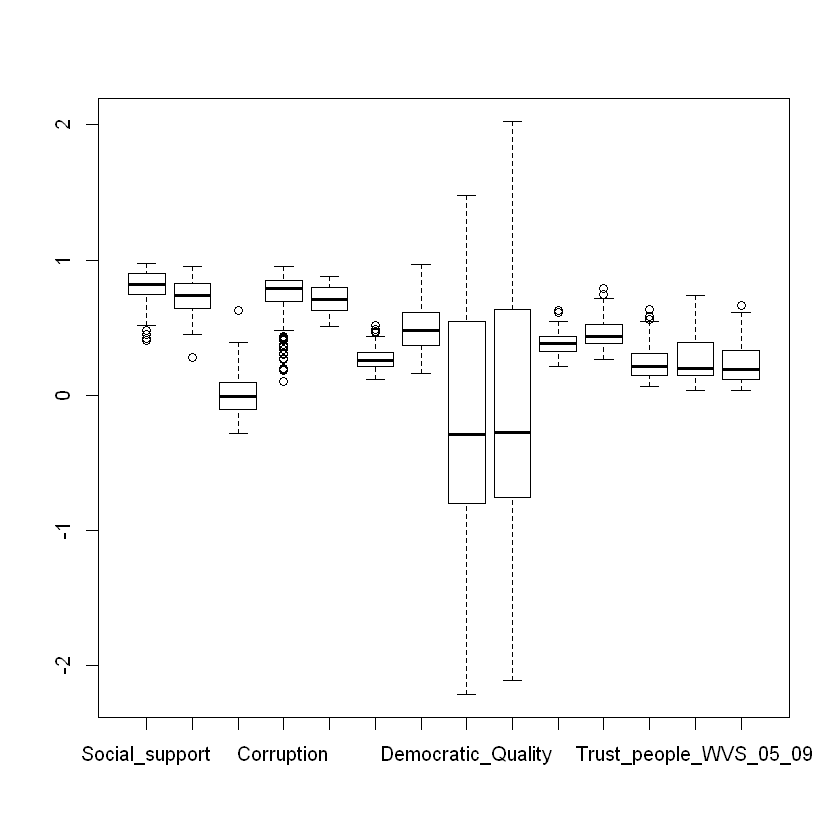

In [44]:
boxplot(brut[,c(4,6:18)], na.rm = T)

In [37]:
cor(na.omit(brut[,2:18]))

,Life_Ladder,GDP_PPP,Social_support,HALE_birth,Freedom,Generosity,Corruption,Positive_affect,Negative_affect,Confidence_government,Democratic_Quality,Delivery_Quality,GINI_2000_16_WB,GINI_household_income_Gallup,Trust_People_Gallup,Trust_people_WVS_05_09,Trust_people_WVS_10_14
Life_Ladder,1.0000000,0.75831887,0.8069963,0.7887037,0.5135344,0.3842139,-0.19265504,0.69116223,-0.29414794,-0.320631756,0.67131042,0.67745000,0.03342260,-0.10755731,0.38801255,0.430569496,0.3888249
GDP_PPP,0.7583189,1.00000000,0.6442664,0.7805163,0.3477302,0.3699307,-0.28372166,0.32267161,-0.26937200,-0.257166348,0.71492988,0.81282055,-0.40791150,-0.06002479,0.54215957,0.562426955,0.6309442
Social_support,0.8069963,0.64426638,1.0000000,0.7339418,0.3231829,0.1334620,-0.02532120,0.42227255,-0.28559259,-0.417106153,0.47790383,0.45980591,-0.10351557,-0.31799772,0.29277139,0.435166174,0.3211109
HALE_birth,0.7887037,0.78051630,0.7339418,1.0000000,0.3362437,0.1909103,-0.12810064,0.44739359,-0.20045736,-0.441058144,0.71568286,0.75475432,-0.22876461,-0.30551856,0.25908608,0.346129036,0.3086597
Freedom,0.5135344,0.34773025,0.3231829,0.3362437,1.0000000,0.5817742,-0.48590267,0.76474423,-0.56319215,0.258872165,0.59432085,0.61313112,0.13197086,0.30857873,0.38871286,0.236393499,0.2839757
Generosity,0.3842139,0.36993071,0.1334620,0.1909103,0.5817742,1.0000000,-0.32064032,0.53972878,-0.34124409,0.274147641,0.34095432,0.53250885,-0.11824698,0.42235565,0.38083011,0.403717992,0.4707635
Corruption,-0.1926550,-0.28372166,-0.0253212,-0.1281006,-0.4859027,-0.3206403,1.00000000,-0.30873171,0.29665040,-0.528212012,-0.33044524,-0.48206103,0.03837201,-0.23334667,-0.63874334,-0.365369537,-0.4948387
Positive_affect,0.6911622,0.32267161,0.4222726,0.4473936,0.7647442,0.5397288,-0.30873171,1.00000000,-0.49183280,0.047887807,0.50611815,0.50772238,0.45443557,0.32508114,0.31247029,0.140513878,0.1499948
Negative_affect,-0.2941479,-0.26937200,-0.2855926,-0.2004574,-0.5631922,-0.3412441,0.29665040,-0.49183280,1.00000000,-0.181425751,-0.38639945,-0.40789292,0.01056671,-0.08484501,-0.56715202,-0.285769773,-0.3649473
Confidence_government,-0.3206318,-0.25716635,-0.4171062,-0.4410581,0.2588722,0.2741476,-0.52821201,0.04788781,-0.18142575,1.000000000,-0.26232333,-0.01488672,0.11026522,0.23028729,0.09284714,0.004482223,0.1172521


On garde:
- Les variables fortement corrélés à Y (Life_ladder)
- Parmis ceux corrélées entre elles, uniquement la plus corrélée à Y


Donc on supprime:
- `Democratic_Quality` pour garder `Delivery_Quality`
- `GINI 2000-16` pour garder `GINI household`
- Les `Trust_people` pour garder `Trust_people_2005-2009`


On effectue une régression sur les variables restantes


**MODELE 2**

In [49]:
donnees2 <- brut[,-c(12,14,16,18)]

In [52]:
mod2 <- lm(Life_Ladder~., data = donnees2[,2:14])
summary(mod2)


Call:
lm(formula = Life_Ladder ~ ., data = donnees2[, 2:14])

Residuals:
     Min       1Q   Median       3Q      Max 
-0.92436 -0.16028  0.03869  0.17871  0.72109 

Coefficients:
                               Estimate Std. Error t value Pr(>|t|)   
(Intercept)                  -2.371e+00  1.530e+00  -1.549  0.12940   
GDP_PPP                       1.644e-05  7.758e-06   2.118  0.04057 * 
Social_support                2.582e+00  9.665e-01   2.672  0.01095 * 
HALE_birth                    4.106e-02  1.713e-02   2.397  0.02141 * 
Freedom                       1.228e+00  9.288e-01   1.322  0.19387   
Generosity                    7.744e-02  5.140e-01   0.151  0.88102   
Corruption                   -7.367e-01  4.590e-01  -1.605  0.11661   
Positive_affect               3.405e+00  9.756e-01   3.490  0.00122 **
Negative_affect               1.665e+00  1.052e+00   1.583  0.12144   
Confidence_government        -7.177e-01  4.726e-01  -1.519  0.13691   
Delivery_Quality             -1.242e-0

In [66]:
cor(na.omit(donnees2[,2:14]))

,Life_Ladder,GDP_PPP,Social_support,HALE_birth,Freedom,Generosity,Corruption,Positive_affect,Negative_affect,Confidence_government,Delivery_Quality,GINI_household_income_Gallup,Trust_people_WVS_05_09
Life_Ladder,1.0000000,0.8275878,0.8052179,0.7894754,0.6680648,0.4658326,-0.4730547,0.7065676,-0.32408896,-0.1328547141,0.7752866101,-0.18003485,0.5525613
GDP_PPP,0.8275878,1.0000000,0.7027649,0.7878935,0.5206712,0.3888439,-0.5096258,0.4539564,-0.29617565,-0.1042939661,0.8582237019,-0.22715846,0.6102841
Social_support,0.8052179,0.7027649,1.0000000,0.6615030,0.4561906,0.2879982,-0.2117766,0.5290512,-0.36677887,-0.3007469205,0.6150398457,-0.37797654,0.4983485
HALE_birth,0.7894754,0.7878935,0.6615030,1.0000000,0.4359634,0.2157103,-0.3559748,0.3809074,-0.19851650,-0.2618783474,0.7643853364,-0.38761610,0.4626444
Freedom,0.6680648,0.5206712,0.4561906,0.4359634,1.0000000,0.5967346,-0.6170461,0.7512066,-0.53667471,0.3552136042,0.6542292151,0.16010435,0.4719006
Generosity,0.4658326,0.3888439,0.2879982,0.2157103,0.5967346,1.0000000,-0.3959096,0.6061032,-0.25088236,0.3537938809,0.4397459122,0.29105345,0.4640161
Corruption,-0.4730547,-0.5096258,-0.2117766,-0.3559748,-0.6170461,-0.3959096,1.0000000,-0.3541224,0.35128137,-0.4829629727,-0.6592152675,-0.14094741,-0.5648434
Positive_affect,0.7065676,0.4539564,0.5290512,0.3809074,0.7512066,0.6061032,-0.3541224,1.0000000,-0.43832392,0.1080188812,0.5150037965,0.16934994,0.2817021
Negative_affect,-0.3240890,-0.2961757,-0.3667789,-0.1985165,-0.5366747,-0.2508824,0.3512814,-0.4383239,1.00000000,-0.1617665274,-0.4590955740,0.06253595,-0.3974786
Confidence_government,-0.1328547,-0.1042940,-0.3007469,-0.2618783,0.3552136,0.3537939,-0.4829630,0.1080189,-0.16176653,1.0000000000,-0.0002291397,0.27914704,0.2563478


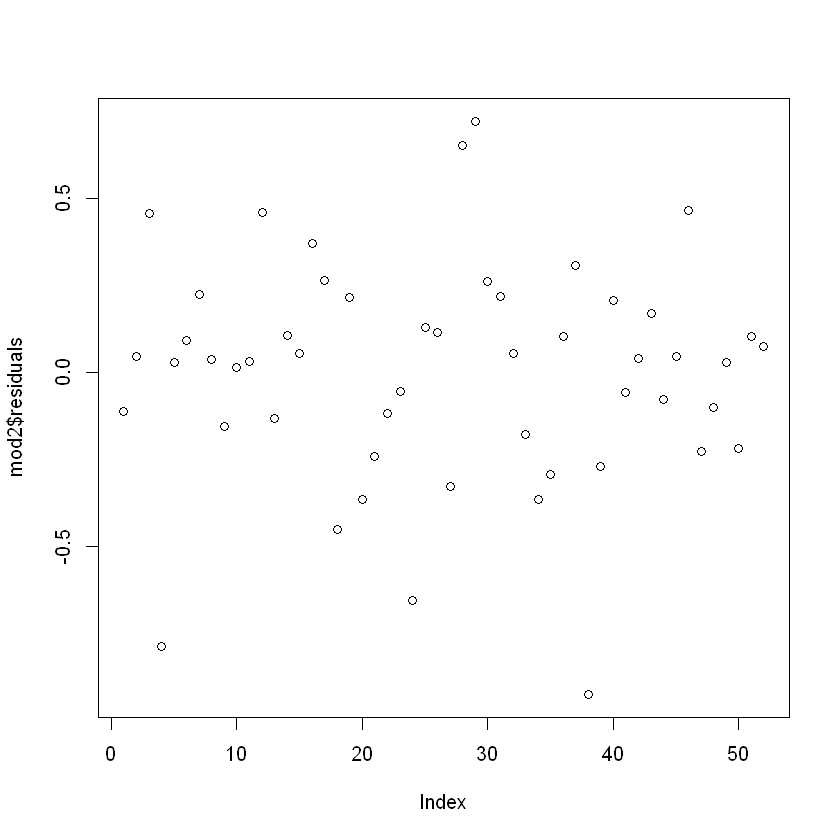

In [67]:
plot(mod2$residuals)